In [1]:
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std = 2, # クラスタの大きさ（標準偏差）
                  random_state=3   # 乱数種（再現用）
                 )

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired);

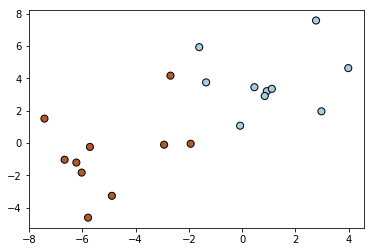

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [4]:
# 境界線を引く関数の定義

def plotBoundary(X, clf, mesh=True, boundary=True, n_neighbors=1):

    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])

    # visualizing decision function
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]) # evaluate the value 
    
    Z = Z.reshape(XX.shape) # just reshape

    if mesh:
        plt.pcolormesh(XX, YY, Z, zorder=-10) # paint in 2 colors, if Z > 0 or not

    if boundary:
        plt.contour(XX, YY, Z, 
                    colors='k', linestyles='-', levels=[0])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

In [5]:
from sklearn.linear_model import Perceptron

clf = Perceptron()
clf

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

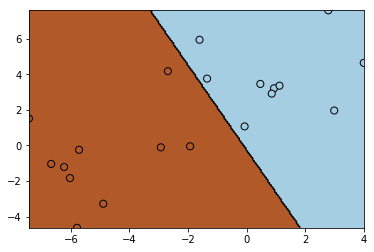

In [6]:
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

plotBoundary(X, clf) # 境界線の描画

In [7]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/K8kugARA/width/939/height/469/border/888888/sri/true/sdz/true" width="939px" height="469px" style="border:0px;"> </iframe>')

In [8]:
from IPython.display import HTML
HTML('<iframe scrolling="no" src="https://www.geogebra.org/material/iframe/id/gMppVQV7/width/930/height/450/border/888888" width="930px" height="450px" style="border:0px;"> </iframe>')

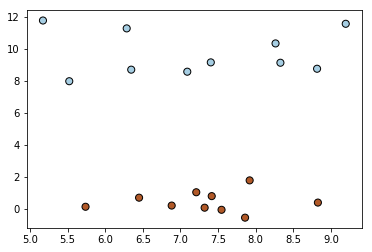

In [9]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=8   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

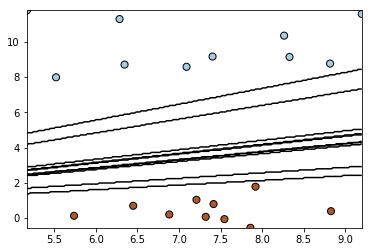

In [10]:
for s in range(10):

    clf.random_state = s
    
    clf.fit(X,y)

    plotBoundary(X, clf, mesh=False)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

In [11]:
clf.coef_, clf.intercept_

(array([[  6.07714012, -11.32380346]]), array([ 1.]))

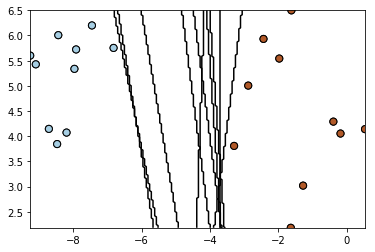

In [12]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

clf.warm_start = True

for s in range(10):
    
    clf.random_state = s
    
    clf.coef_, clf.intercept_ = np.random.rand(1,2) * 10 - 5, np.random.rand(1) * 10 + 30

    clf.fit(X,y)

    plotBoundary(X, clf, mesh=False)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

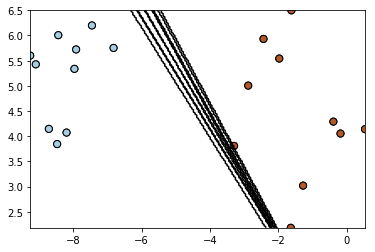

In [13]:
X, y = make_blobs(n_samples=20, # 20個生成
                  n_features=2, # 2次元
                  centers=2,    # クラスタ中心2個
                  cluster_std =1, # クラスタの大きさ（標準偏差）
                  random_state=7   # 乱数種（再現用）
                 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

clf.warm_start = False

for s in range(10):

    clf.random_state = s
    
    clf.fit(X,y)

    plotBoundary(X, clf, mesh=False)
    
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')

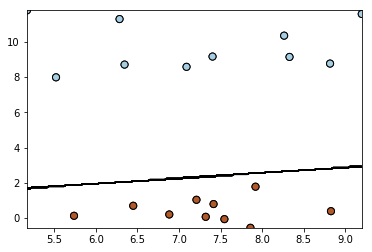

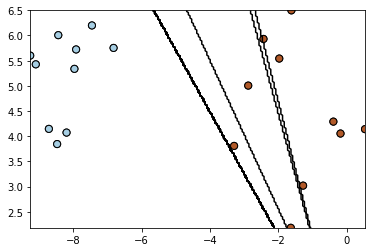

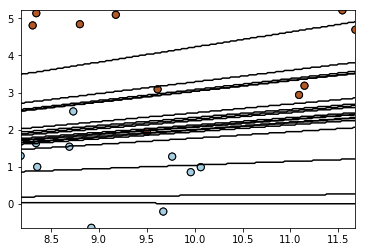

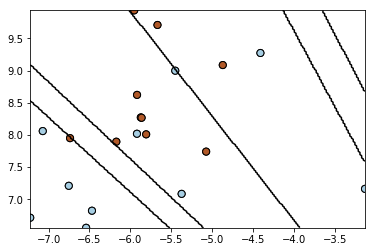

In [14]:
clf = Perceptron()
clf.random_state = 4
    
for rs in [8,7,4,5]:

    X, y = make_blobs(n_samples=20, # 20個生成
                      n_features=2, # 2次元
                      centers=2,    # クラスタ中心2個
                      cluster_std =1, # クラスタの大きさ（標準偏差）
                      random_state=rs
                     )
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');


    for i in range(1,20):

        clf.n_iter = i # epochs

        clf.fit(X,y)

        plotBoundary(X, clf, mesh=False)

    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.show()

In [15]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [16]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [17]:
clf = Perceptron() # default n_iter=5
clf.fit(X_train, y_train) # no scaling
clf.score(X_test, y_test)

0.86842105263157898

1 0.412280701754
2 0.850877192982
3 0.824561403509
4 0.842105263158
5 0.833333333333
6 0.885964912281
7 0.868421052632
8 0.868421052632
9 0.90350877193
10 0.885964912281
11 0.833333333333
12 0.868421052632
13 0.912280701754
14 0.842105263158
15 0.842105263158
16 0.842105263158
17 0.842105263158
18 0.850877192982
19 0.833333333333
20 0.921052631579
21 0.859649122807
22 0.842105263158
23 0.842105263158
24 0.842105263158
25 0.859649122807
26 0.842105263158
27 0.842105263158
28 0.833333333333
29 0.833333333333
30 0.833333333333
31 0.833333333333
32 0.894736842105
33 0.833333333333
34 0.894736842105
35 0.877192982456
36 0.947368421053
37 0.885964912281
38 0.947368421053
39 0.894736842105
40 0.885964912281
41 0.833333333333
42 0.947368421053
43 0.947368421053
44 0.859649122807
45 0.868421052632
46 0.947368421053
47 0.833333333333
48 0.868421052632
49 0.868421052632


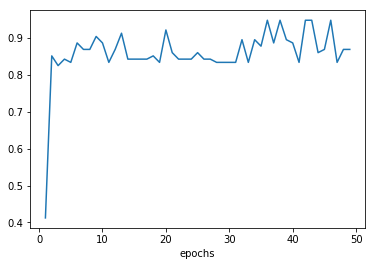

In [18]:
clf = Perceptron(warm_start=True, n_iter=1)

scores = []
n_range = range(1,50)
for n in n_range:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(n, score)
    scores.append(score)
scores = np.array(scores)

plt.plot(n_range, scores)
plt.xlabel("epochs")

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale  = scaler.transform(X_test)

1 0.938596491228
2 0.964912280702
3 0.964912280702
4 0.947368421053
5 0.833333333333
6 0.956140350877
7 0.850877192982
8 0.973684210526
9 0.868421052632
10 0.912280701754
11 0.877192982456
12 0.929824561404
13 0.921052631579
14 0.885964912281
15 0.956140350877
16 0.956140350877
17 0.947368421053
18 0.894736842105
19 0.921052631579
20 0.947368421053
21 0.947368421053
22 0.947368421053
23 0.938596491228
24 0.956140350877
25 0.947368421053
26 0.964912280702
27 0.956140350877
28 0.964912280702
29 0.956140350877
30 0.956140350877
31 0.956140350877
32 0.956140350877
33 0.947368421053
34 0.956140350877
35 0.90350877193
36 0.947368421053
37 0.929824561404
38 0.956140350877
39 0.964912280702
40 0.964912280702
41 0.964912280702
42 0.956140350877
43 0.956140350877
44 0.921052631579
45 0.956140350877
46 0.964912280702
47 0.956140350877
48 0.956140350877
49 0.956140350877


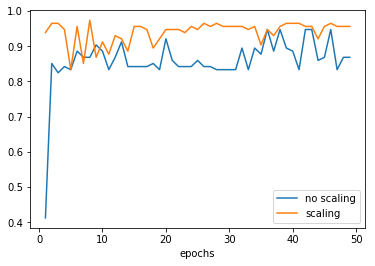

In [20]:
clf = Perceptron(warm_start=True, n_iter=1)

scores2 = []
n_range = range(1,50)
for n in n_range:
    clf.fit(X_train_scale, y_train)
    score = clf.score(X_test_scale, y_test)
    print(n, score)
    scores2.append(score)
scores2 = np.array(scores2)

plt.plot(n_range, scores, label="no scaling")
plt.plot(n_range, scores2, label="scaling")
plt.legend(loc="best")
plt.xlabel("epochs")

In [21]:
clf = Perceptron(n_iter=50)
clf.fit(X_train_scale, y_train)
clf.score(X_test_scale, y_test)

0.95614035087719296

In [22]:
clf = Perceptron() # default n_iter=5
clf.fit(X_train, y_train) # no scaling
clf.score(X_test, y_test)

0.86842105263157898